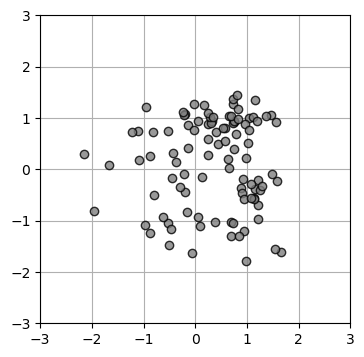

In [19]:
import numpy as np
import matplotlib.pyplot as plt
#data生成
np.random.seed(seed=1)
N=100#データの数
K=3#ガウス分布の数
T=np.zeros((N,3),dtype=np.uint8)
X=np.zeros((N,2))
X0_min,X0_max=-3,3#x0の範囲表示用
X1_min,X1_max=-3,3
prm_mu=np.array([[-0.5,-0.5],[0.5,1.0],[1,-0.5]])#中心
prm_sig=np.array([[0.7,0.7],[0.8,0.3],[0.3,0.8]])#分布の分散
prm_pi=np.array([0.4,0.8,1])#各分布への割合を決めるパラメータ
cols=["cornflowerblue","black","white"]

for n in range(N):
    r=np.random.rand()
    for k in range(K):
        if r<prm_pi[k]:
            T[n,k]=1
            break
    for k in range(2):
        X[n,k]=\
            np.random.randn()*prm_sig[T[n,:]==1,k]\
            +prm_mu[T[n,:]==1,k]
#dataの図示
def show_data(x):
    plt.plot(
        x[:,0],x[:,1],"gray",
        marker="o",linestyle="None",
        markeredgecolor="black",
        markersize=6,alpha=0.8,
    )
    plt.grid()
#main
plt.figure(figsize=(4,4))
show_data(X)
plt.xlim(X0_min,X0_max)
plt.ylim(X1_min,X1_max)
plt.show()
np.savez(
    "ch9_data.npz",X=X,
    X0_min=X0_min,X0_max=X0_max,
    X1_min=X1_min,X1_max=X1_max,
)


In [20]:
#MuとRの初期化
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]

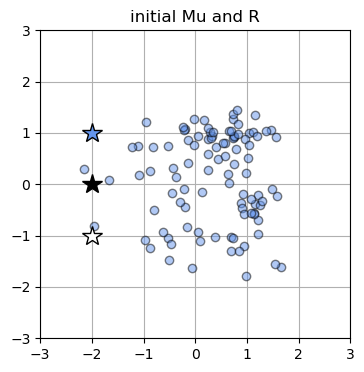

In [21]:
#dataの図示関数
def show_prm(x,r,mu,cols):
    K=r.shape[1]
    for k in range(K):
        #入力データxの描写（クラス指示変数ｒで色分け）
        plt.plot(
            x[r[:,k]==1,0],x[r[:,k]==1,1],cols[k],
            marker="o",linestyle="None",markeredgecolor="black",
            markersize=6,alpha=0.5,
        )
        #クラスターの中心ベクトルmuを星マークで描写
        plt.plot(
            mu[k,0],mu[k,1],cols[k],
            marker="*",markeredgecolor="black",
            markersize=15,markeredgewidth=1,
        )
        plt.xlim(X0_min,X0_max)
        plt.ylim(X1_min,X1_max)
        plt.grid()
#main
plt.figure(figsize=(4,4))
R=np.c_[np.ones((N,1)),np.zeros((N,2))]
show_prm(X,R,Mu,cols)
plt.title("initial Mu and R")
plt.show()

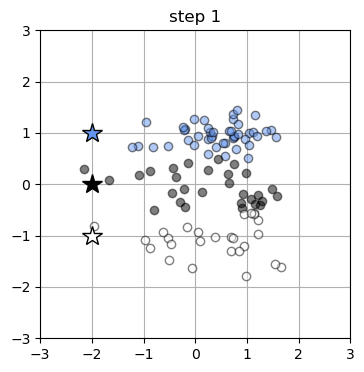

In [22]:
#rを決める
def step1_kmeans(x0,x1,mu):
    N=len(x0)
    K=mu.shape[0]#muの行数
    r=np.zeros((N,K))
    for n in range(N):
        d=np.zeros(K)
        for k in range(K):
            d[k]=(x0[n]-mu[k,0])**2+(x1[n]-mu[k,1])**2
        r[n,np.argmin(d)]=1#最も近いクラスターの所属にする
    return r  
#main
plt.figure(figsize=(4,4))
R=step1_kmeans(X[:,0],X[:,1],Mu)
show_prm(X,R,Mu,cols)
plt.title("step 1")
plt.show()

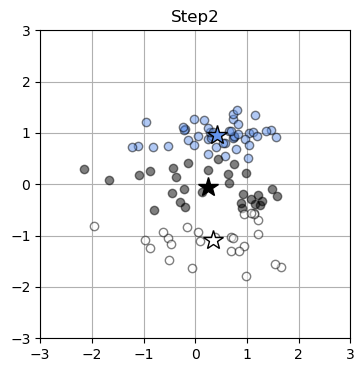

In [23]:
#Muを決める(step2)
def step2_kmeans(x0,x1,r):
    K=r.shape[1]
    mu=np.zeros((K,2))
    for k in range(K):
        N_k=np.sum(r[:,k])
        mu[k,0]=np.sum(r[:,k]*x0)/N_k
        mu[k,1]=np.sum(r[:,k]*x1)/N_k
    return mu
#main
plt.figure(figsize=(4,4))
Mu=step2_kmeans(X[:,0],X[:,1],R)
show_prm(X,R,Mu,cols)
plt.title("Step2")
plt.show()


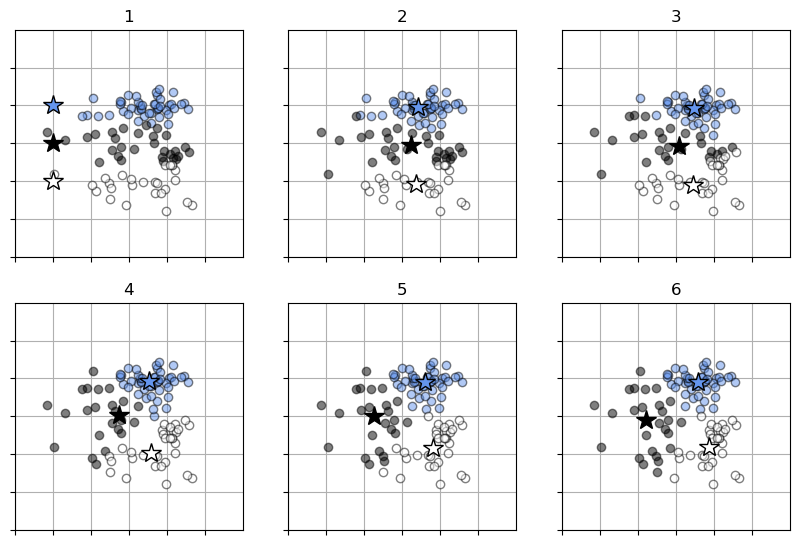

In [24]:
plt.figure(figsize=(10,6.5))
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
max_it=6#繰り返しの回数
for it in range(0,max_it):
    #step1,Rの更新
    R=step1_kmeans(X[:,0],X[:,1],Mu)
    #結果表示
    plt.subplot(2,3,it+1)
    show_prm(X,R,Mu,cols)
    plt.title("{0:d}".format(it+1))
    plt.xticks(range(X0_min,X0_max),"")
    plt.yticks(range(X1_min,X1_max),"")
    #step2、Muの更新
    Mu=step2_kmeans(X[:,0],X[:,1],R)
plt.show()

In [28]:
def distortion_measure(x0,x1,r,mu):
    #入力xは２次元としx0,x1で入力
    N=len(x0)
    K=r.shape[1]
    J=0
    for n in range(N):
        for k in range(K):
            J=J+r[n,k]*((x0[n]-mu[k,0])**2+(x1[n]-mu[k,1])**2)
    return J
#test
#MuとRの初期化
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
#歪み尺度の計算
distortion=distortion_measure(X[:,0],X[:,1],R,Mu)
print(f"distortion measure={distortion:.6f}")

distortion measure=771.709117


distortion measure= [627.54  73.39  70.39  57.59  48.31  47.28  46.86  46.86  46.86  46.86]


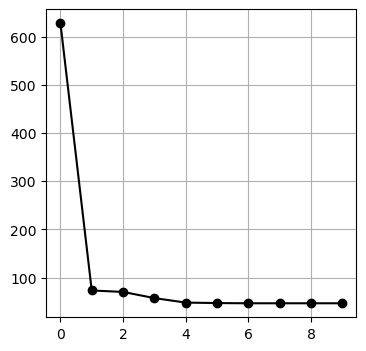

In [31]:
#main
#MuとRの初期化
N=X.shape[0]
Mu=np.array([[-2,1],[-2,0],[-2,-1]])
R=np.c_[np.ones((N,1),dtype=int),np.zeros((N,2),dtype=int)]
#k-means法のステップごとで歪み尺度を計算
max_it=10
it=0
DM=np.zeros(max_it)#歪み尺度の計算結果を入れる配列を準備
for it in range(0,max_it):
    R=step1_kmeans(X[:,0],X[:,1],Mu)#step1Muとの距離
    DM[it]=distortion_measure(X[:,0],X[:,1],R,Mu)#歪み尺度
    Mu=step2_kmeans(X[:,0],X[:,1],R)#step2
print("distortion measure=",np.round(DM,2))
#グラフ描画
plt.figure(figsize=(4,4))
plt.plot(DM,"black",linestyle="-",marker="o")
plt.grid()
plt.show()